In [150]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

city=pd.read_csv('city temp.csv')
global_temp=pd.read_csv('global temp.csv')

In [173]:
city=city.loc[city['year']>=1947]
global_temp=global_temp.loc[global_temp['year']>=1947]
global_temp=global_temp.loc[global_temp['year']<=2013]

last_ten_years_city=city.loc[city['year']>=2003]
last_ten_years_global=global_temp.loc[global_temp['year']>=2003]
last_ten_years_global=last_ten_years_global.loc[last_ten_years_global['year']<=2013]

[]

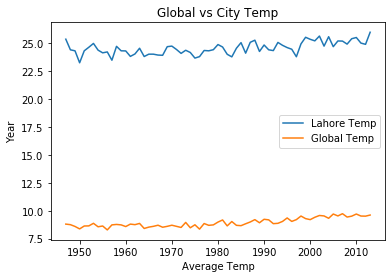

In [174]:
overall=plt.plot(city['year'],city['avg_temp'],label="Lahore Temp")
ten_years=plt.plot(global_temp['year'],global_temp['avg_temp'],Label="Global Temp")
plt.xlabel('Average Temp') 
plt.ylabel('Year') 
plt.title('Global vs City Temp') 
plt.legend()
plt.plot()

[]

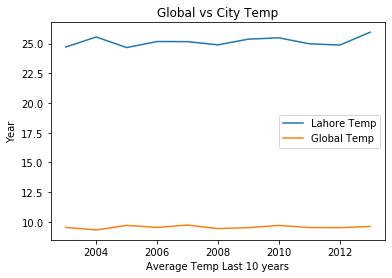

In [175]:
last_ten_year=plt.plot(last_ten_years_city['year'],last_ten_years_city['avg_temp'],label="Lahore Temp")
last_ten_years_global=plt.plot(last_ten_years_global['year'],last_ten_years_global['avg_temp'],Label="Global Temp")
plt.xlabel('Average Temp Last 10 years') 
plt.ylabel('Year') 
plt.title('Global vs City Temp') 
plt.legend()
plt.plot()

In [185]:
city1=city
global_temp1=global_temp
city1.loc['ravg']='NaN'
global_temp1['ravg']='NaN'
city1['ravg']=city['avg_temp'].rolling(window=10).mean()
global_temp1['ravg']=global_temp['avg_temp'].rolling(window=10).mean()
city1
global_temp1

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,year,avg_temp,ravg
197,1947,8.80,NaN
198,1948,8.75,NaN
199,1949,8.59,NaN
200,1950,8.37,NaN
201,1951,8.63,NaN
...,...,...,...
259,2009,9.51,9.493
260,2010,9.70,9.543
261,2011,9.52,9.554
262,2012,9.51,9.548


In [204]:
df=pd.DataFrame(columns=['Year','Lahore','Global'])
Lahore=city1.iloc[0:-1:9].reset_index()
Lahore=Lahore.dropna()
Global=global_temp1.iloc[0:-1:9].reset_index()
Global=Global.dropna()
df=pd.concat([Lahore['year'],Lahore['ravg'],Global['ravg']],axis=1)
#df.iloc[:, [1]]
df

,year,ravg,ravg
1,1956,24.372,8.612
2,1965,24.099,8.644
3,1974,24.210,8.617
4,1983,24.176,8.765
5,1992,24.539,8.957
6,2001,24.781,9.176
7,2010,25.178,9.543


[]

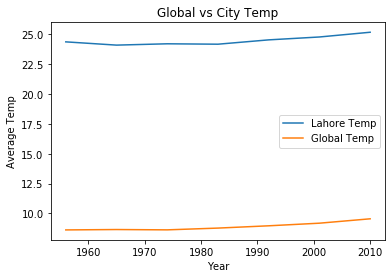

In [203]:
overall1=plt.plot(df['year'],df.iloc[:, [1]],label="Lahore Temp")
ten_years1=plt.plot(df['year'],df.iloc[:, [2]],Label="Global Temp")
plt.xlabel('Year') 
plt.ylabel('Average Temp') 
plt.title('Global vs City Temp') 
plt.legend()
plt.plot()